![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [144]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [145]:
peak_crimes_hour = crimes["TIME OCC"].value_counts()
print(peak_crimes_hour)

1200    6462
1800    3991
2000    3769
1700    3754
0001    3587
        ... 
2332       4
2259       3
0511       3
0528       3
0531       3
Name: TIME OCC, Length: 1439, dtype: int64


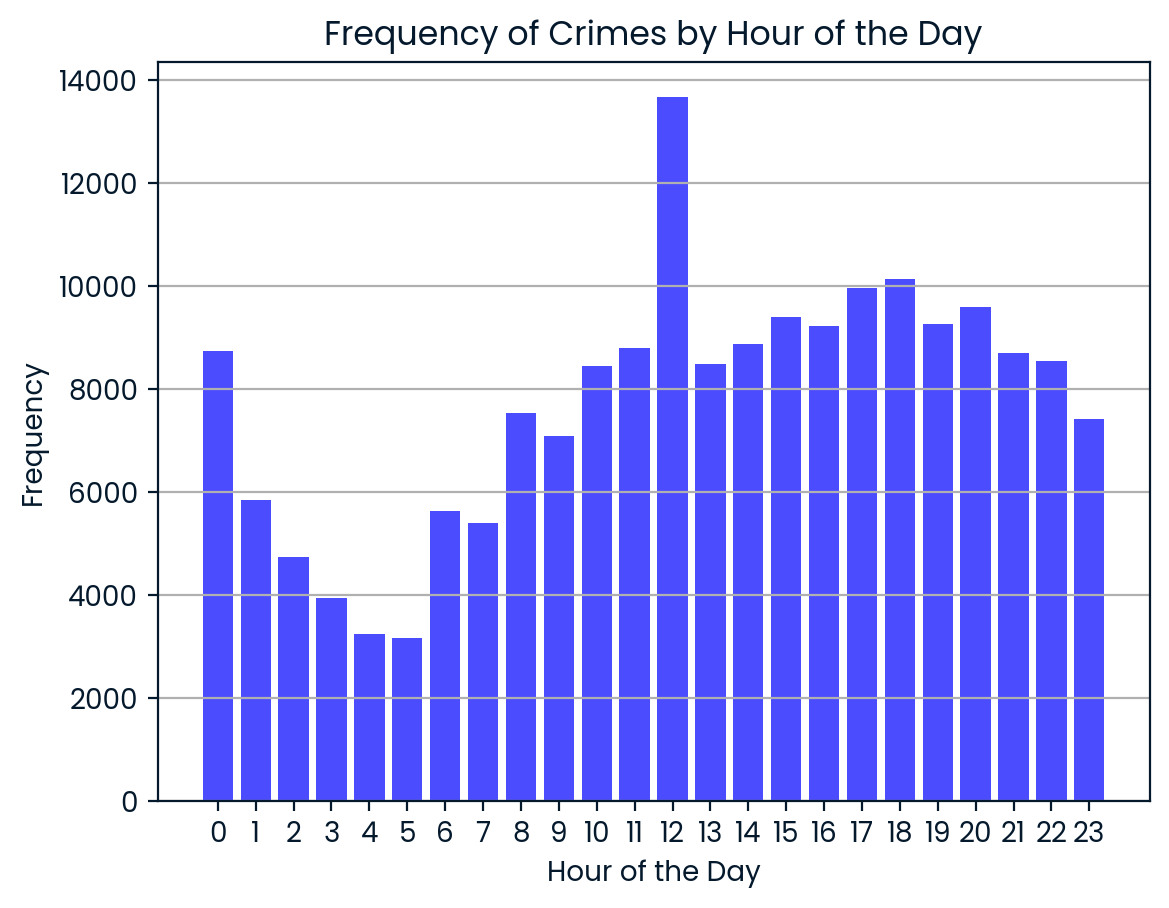

In [146]:
# Extract hours from the 'TIME OCC' column and convert to integer

crimes['hour'] = crimes['TIME OCC'].str[:2].astype(int)

#count occurance per hour and plot

hour_counts = crimes['hour'].value_counts().sort_index()

plt.bar(hour_counts.index, hour_counts.values, color='blue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of Crimes by Hour of the Day')
plt.xticks(range(0, 24))  # Ensure x-axis has all hours
plt.grid(axis='y')
plt.show()



In [147]:

crime_counts_per_hour = crimes.groupby('hour').size().reset_index(name='count')
sorted_crime_hours = crime_counts_per_hour.sort_values(by='count', ascending=False)
peak_crime_hour = sorted_crime_hours.iloc[0]['hour']
print(f'The time with the highest number of crimes is: {peak_crime_hour}')

The time with the highest number of crimes is: 12


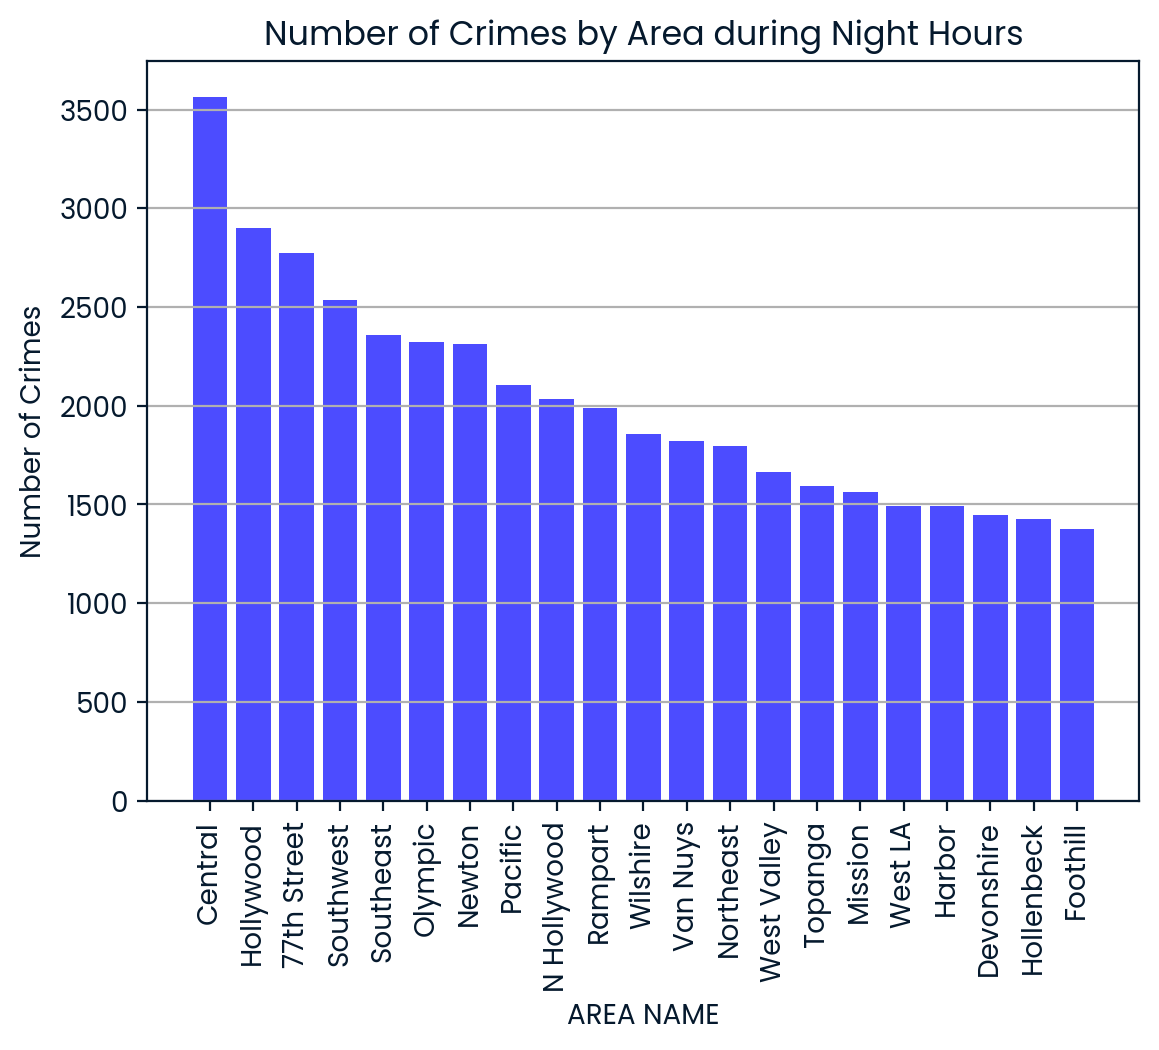

In [148]:
night_hours = list(range(22, 24)) + list(range(0, 5))
night_time_crimes = crimes[crimes['hour'].isin(night_hours)]
crimes_by_area = night_time_crimes['AREA NAME'].value_counts()

# Plot the frequency of crimes by area
plt.bar(crimes_by_area.index, crimes_by_area.values, color='blue', alpha=0.7)
plt.xlabel('AREA NAME')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Area during Night Hours')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.grid(axis='y')
plt.show()

In [149]:
crime_counts_by_area = night_time_crimes.groupby('AREA NAME').size().reset_index(name='count')
sorted_crime_counts = crime_counts_by_area.sort_values(by='count', ascending=False)
peak_night_crime_location = sorted_crime_counts.iloc[0]['AREA NAME']
print(f'The area with the highest number of crimes during night hours is: {peak_night_crime_location}')


The area with the highest number of crimes during night hours is: Central


In [150]:
#define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
crimes = crimes[crimes["Vict Age"] >= 0]

#create a new column with the age bin as a series
crimes["Binned Age"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels, right=True)
victim_ages = crimes["Binned Age"].value_counts().sort_index()
print(victim_ages )


0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Binned Age, dtype: int64
